In [1]:
import math

import bs4
import matplotlib.pyplot as plt
import pandas as pd
import requests
import sqlalchemy as db
import seaborn as sns

### global variable

In [ ]:
# any constants you might need, for example:

TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
# add other constants to refer to any local data, e.g. uber & weather
UBER_CSV = "uber_rides_sample.csv"

NEW_YORK_BOX_COORDS = ((40.560445, -74.242330), (40.908524, -73.717047))

DATABASE_URL = "sqlite:///project.db"
DATABASE_SCHEMA_FILE = "schema.sql"
QUERY_DIRECTORY = "queries"

## Part 1: Data Preprocessing

_A checklist of requirements to keep you on track. Remove this whole cell before submitting the project. The order of these tasks aren't necessarily the order in which they need to be done. It's okay to do them in an order that makes sense to you._

* [ ] Define a function that calculates the distance between two coordinates in kilometers that **only uses the `math` module** from the standard library
* [ ] Write at least one unit test that tests this distance calculation function. 
* Taxi data:
    * [ ] Use `requests`, BeautifulSoup (`bs4`), and `pandas` to programmatically download the required CSV files & load into memory.
    * [ ] Clean the data, including:
        * Remove unnecessary columns
        * Remove invalid data points (take a moment to consider what's invalid)
        * Normalize column names
        * Remove trips that start and/or end outside the designated [coordinate box](http://bboxfinder.com/#40.560445,-74.242330,40.908524,-73.717047)
    * [ ] Sample the data so that you have roughly the same amount of data points over the given date range for both Taxi data and Uber data.
    * You may need to do this one file at a time - download, clean, sample. You can cache the sampling by saving it as a CSV file (and thereby freeing up memory on your computer) before moving onto the next file. 
* Uber data:
    * [ ] Download the data manually in the link provided in the project doc.
    * [ ] Load the data from your local computer (using `pandas`), then clean the data, including: 
        * Remove unnecessary columns
        * Remove invalid data points (take a moment to consider what's invalid)
        * Normalize column names
        * Remove trips that start and/or end outside the designated [coordinate box]
* Using the function that calculates the distance between two coordinates in kilometers, add a column to each `pandas` DataFrame of data that calculates the distance between pickup and dropoff locations for each trip.
* Weather data:
    * [ ] Download the data manually in the link provided in the project doc.
    * [ ] Load the data from your local computer (using `pandas`), then clean the data, including: 
        * Remove unnecessary columns
        * Remove invalid data points (take a moment to consider what's invalid)
        * Normalize column names
        * Split into two `pandas` DataFrames: one for required hourly data, and one for the required daily daya.
        * You may find that the weather data you need later on does not exist at the frequency needed (daily vs hourly). You may calculate/generate samples from one to populate the other. Just document what you’re doing so we can follow along. 
* Take a look at the lecture notes from the `pandas` lecture for hints on helpful functionality

### Calculating distance
_Write some prose that tells the reader what you're about to do here._

In [4]:
def calculate_distance(from_coord, to_coord):
    raise NotImplemented()

In [6]:
def test_calculate_distance():
    raise NotImplemented()

In [ ]:
from math import radians, cos, sin, asin, sqrt

def add_distance_column(dataframe):
    dataframe['distance'] = 0
    def distance(lat1 = 0, lat2 = 0, lon1 = 0, lon2= 0):
        lon1 = radians(lon1)
        lon2 = radians(lon2)
        lat1 = radians(lat1)
        lat2 = radians(lat2)

        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

        c = 2 * asin(sqrt(a))

        # Radius of earth in kilometers. Use 3956 for miles
        r = 6371

        # calculate the result
        return(c * r)
    for index,row in dataframe.iterrows():
        d = distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude'])
        dataframe.at[index,'distance'] = d
    

### Uber Data Cleaning

In [2]:
uber_rides = pd.read_csv('uber_rides_sample.csv')
uber_rides = uber_rides.drop(['Unnamed: 0','key'], axis=1) #Remove unnecessary columns
uber_rides

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
uber_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [4]:
uber_rides = uber_rides.dropna(axis=0,how='any')

In [5]:
uber_rides.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Remove invalid data points

#### passenger_count 

In [6]:
#Unexpected max value in passenger_count:
passenger_outliers = uber_rides[uber_rides['passenger_count'] >= 7]
passenger_outliers

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [7]:
#Remove the outliers for passenger_count:
uber_rides = uber_rides[uber_rides['passenger_count'] <= 7]

#### fare_amount 

C:\Users\89589\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

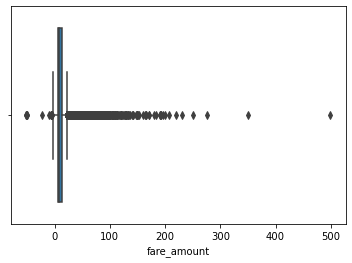

In [8]:
sns.boxplot(uber_rides['fare_amount'])

In [9]:
amount_outliers_too_low = uber_rides[uber_rides['fare_amount'] <= 0]
amount_outliers_too_low.fare_amount.count()

22

In [10]:
amount_outliers_too_high = uber_rides[uber_rides['fare_amount'] >= 100]
amount_outliers_too_high.fare_amount.count()

90

In [11]:
#Remove the outliers for fare_amount:
uber_rides = uber_rides[uber_rides['fare_amount'] <= 100]
uber_rides = uber_rides[uber_rides['fare_amount'] >= 0]

#### pickup_longitude/dropoff_longitude/pickup_latitude/dropoff_latitude

In [12]:
#Remove the cancel order for uber_rides:
uber_rides = uber_rides[uber_rides['pickup_longitude'] != 0]
uber_rides = uber_rides[uber_rides['pickup_latitude'] != 0]
uber_rides = uber_rides[uber_rides['dropoff_longitude'] != 0]
uber_rides = uber_rides[uber_rides['dropoff_latitude'] != 0]

In [15]:
uber_rides = uber_rides[uber_rides['pickup_longitude'] <= -73.717047]
uber_rides = uber_rides[uber_rides['pickup_longitude'] >= -74.242330]
uber_rides = uber_rides[uber_rides['dropoff_longitude'] <= -73.717047]
uber_rides = uber_rides[uber_rides['dropoff_longitude'] >= -74.242330]
uber_rides = uber_rides[uber_rides['pickup_latitude'] <= 40.908524]
uber_rides = uber_rides[uber_rides['pickup_latitude'] >= 40.560445]
uber_rides = uber_rides[uber_rides['dropoff_latitude'] <= 40.908524]
uber_rides = uber_rides[uber_rides['dropoff_latitude'] >= 40.560445]
uber_rides

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [16]:
uber_rides.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195425.000000,195425.000000,195425.000000,195425.000000,195425.000000,195425.000000
mean,11.266033,-73.975547,40.750800,-73.974612,40.751058,1.683899
std,9.321915,0.034343,0.026873,0.033842,0.030587,1.307271
min,0.000000,-74.225452,40.565528,-74.237280,40.561228,0.000000
25%,6.000000,-73.992278,40.736473,-73.991597,40.735353,1.000000
50%,8.500000,-73.982122,40.753304,-73.980558,40.753737,1.000000
75%,12.500000,-73.968420,40.767513,-73.965483,40.768304,2.000000
max,100.000000,-73.720520,40.908310,-73.717899,40.907857,6.000000


### Taxi data

In [ ]:
def find_taxi_csv_urls():
    content = requests.get(TAXI_URL)
    soup = bs(content.text, 'html.parser')
    tags = soup('a')
    years = ['2009','2010','2011','2012','2013','2014','2015']
    montths = ['01','02','03','04','05','06','07','08','09','10','11','12']
    urls = []
    for tag in tags:
        href = (tag.get('href', None))
        if href.endswith(".csv") and 'yellow_tripdata_' in href:
            if any(ext in href for ext in years):
                urls.append(href)
    return urls

def get_and_clean_month_taxi_data(url):
    df = pd.read_csv(url,skiprows=range(1,30),nrows = 2497)
    return df
        
        
def get_and_clean_taxi_data():
    all_taxi_dataframes = []
    
    all_csv_urls = find_taxi_csv_urls()
    for csv_url in all_csv_urls:
        print(csv_url)
        # maybe: first try to see if you've downloaded this exact
        # file already and saved it before trying again
        dataframe = get_and_clean_month_taxi_data(csv_url)
        #add_distance_column(dataframe)
        # maybe: if the file hasn't been saved, save it so you can
        # avoid re-downloading it if you re-run the function
        
        all_taxi_dataframes.append(dataframe)
        print(all_taxi_dataframes)
        
    # create one gigantic dataframe with data from every month needed
    taxi_data = pd.concat(all_taxi_dataframes)
    return taxi_data

In [ ]:
df = get_and_clean_taxi_data()
df1 = df.loc[~df['pickup_longitude'].isnull()]
df2 = df.loc[~df['End_Lon'].isnull()]
df3 = df.loc[~df[' pickup_longitude'].isnull()]

df1 = df1[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'vendor_id',
       'pickup_datetime',
       'dropoff_datetime', 'rate_code', 'surcharge']]
df2 = df2[['mta_tax', 'surcharge', 'vendor_name',
       'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime', 'Passenger_Count',
       'Trip_Distance', 'Start_Lon', 'Start_Lat', 'End_Lon', 'End_Lat', 'Payment_Type', 'Fare_Amt',
       'Tip_Amt', 'Tolls_Amt', 'Total_Amt']]
df3 = df3[['vendor_id',
       ' pickup_datetime', ' dropoff_datetime', ' passenger_count',
       ' trip_distance', ' pickup_longitude', ' pickup_latitude',
       ' dropoff_longitude', ' dropoff_latitude',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount']]
df2.rename(columns={"Tip_Amt":"tip_amount","Start_Lon": "pickup_longitude", "Start_Lat": "pickup_latitude","End_Lon":"dropoff_longitude","End_Lat":"dropoff_latitude","Passenger_Count":"passenger_count","Tolls_Amt":"tolls_amount","Total_Amt":"total_amount","Trip_Pickup_DateTime":"pickup_datetime","Trip_Dropoff_DateTime":"dropoff_datetime","Trip_Distance":"trip_distance","Payment_Type":"payment_type","Fare_Amt":"fare_amount"},inplace = True)
df3.rename(columns={" surcharge":"surcharge"," mta_tax":"mta_tax","":""," tip_amount":"tip_amount", " pickup_longitude": "pickup_longitude", " pickup_latitude": "pickup_latitude"," dropoff_longitude":"dropoff_longitude"," dropoff_latitude":"dropoff_latitude"," passenger_count":"passenger_count"," tolls_amount":"tolls_amount"," total_amount":"total_amount"," pickup_datetime":"pickup_datetime"," dropoff_datetime":"dropoff_datetime"," trip_distance":"trip_distance"," payment_type":"payment_type"," fare_amount":"fare_amount"},inplace = True)
df_all = pd.concat([df1,df2,df3])
df_11 = df_all[~df_all['tpep_pickup_datetime'].isnull()]
df_22 = df_all[~df_all['pickup_datetime'].isnull()]
df_11.drop(columns = ["pickup_datetime","dropoff_datetime"],inplace = True)
df_11.rename(columns = {"tpep_pickup_datetime":"pickup_datetime","tpep_dropoff_datetime":"dropoff_datetime"},inplace = True)
df_final = pd.concat([df_22,df_11])
df_final.drop(columns = ["tpep_pickup_datetime","tpep_dropoff_datetime"],inplace = True)
df_final['pickup_longitude'] = df_final['pickup_longitude'].replace(np.nan, 0)
df_final['pickup_latitude'] = df_final['pickup_latitude'].replace(np.nan, 0)
df_final['dropoff_longitude'] = df_final['dropoff_longitude'].replace(np.nan, 0)
df_final['dropoff_latitude'] = df_final['dropoff_latitude'].replace(np.nan, 0)
add_distance_column(df_final)
df_final.head()

## Part 2: Storing Cleaned Data

_Write some prose that tells the reader what you're about to do here._

In [ ]:
engine = db.create_engine(DATABASE_URL)

In [ ]:
# if using SQL (as opposed to SQLAlchemy), define the commands 
# to create your 4 tables/dataframes
HOURLY_WEATHER_SCHEMA = """
TODO
"""

DAILY_WEATHER_SCHEMA = """
TODO
"""

TAXI_TRIPS_SCHEMA = """
CREATE TABLE IF NOT EXISTS taxi_trips
(
    ID INTEGER PRIMARY KEY,
    trip_distance FLOAT,
    pickup_longitude FLOAT,
    dropoff_longitude FLOAT,
    dropoff_latitude FLOAT,
    payment_type TEXT,
    fare_amount FLOAT,
    mta_tax FLOAT,
    tip_amount FLOAT,
    tolls_amount FLOAT,
    total_amount FLOAT,
    pickup_datetime DATETIME,
    dropoff_datetime DATETIME,
    rate_code FLOAT,
    surcharge FLOAT,
    distance FLOAT
)
"""

UBER_TRIPS_SCHEMA = """
TODO
"""

In [ ]:
# create that required schema.sql file
with open(DATABASE_SCHEMA_FILE, "w") as f:
    f.write(HOURLY_WEATHER_SCHEMA)
    f.write(DAILY_WEATHER_SCHEMA)
    f.write(TAXI_TRIPS_SCHEMA)
    f.write(UBER_TRIPS_SCHEMA)

In [ ]:
# create the tables with the schema files
with engine.connect() as connection:
    #???
    connection.execute(TAXI_TRIPS_SCHEMA)

### Add Data to Database

_Write some prose that tells the reader what you're about to do here._

In [ ]:
def dataframes_to_table():
    

In [ ]:
table_name_to_dataframe = {
    "taxi_trips": taxi_data,
    "uber_trips": uber_data,
    "hourly_weather": hourly_data,
    "daily_weather": daily_data,
}

dataframes_to_table(table_name_to_dataframe)